# 회귀 트리

지금까지 학습한 회귀 방법은 선형회귀에 기반한 회귀 기법이었다.  
일반적으로 선형회귀는 데이터셋에 결합하는 회귀 함수를 구해, 새로운 특성에 따른 결과값을 예측하는 방법이다.  
따라서 머신러닝의 회귀는 가중치를 기반으로 하는 최적의(오차가 가장 적은) 회귀 함수를 도출하는 것이 목표이다.

## 트리 기반의 회귀 방식

트리 기반의 회귀는 회귀 트리를 이용하는 것이다.  
회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것. 일반적으로 분류모델에서 학습한 분류 트리와 큰 차이는 없다.  
다만 리프노드에서 예측 결정 값을 만드는 과정에서 차이만 있다. 분류 트리에서 특정 클래스 레이블을 결정했다면, 회귀 트리는 리프노드에 있는 데이터 값의 평균 값을 구하여 회귀 예측값을 계산한다.  

<br>

[![](https://user-images.githubusercontent.com/76269316/128442791-7b480936-0598-4c72-aa35-1ccbd2c38bde.png)](https://seominseok4834.github.io/machine%20learning/5.regression/)|[![](https://user-images.githubusercontent.com/76269316/128443187-f99474cc-4791-4cc7-b05c-e8de22446105.png)](https://seominseok4834.github.io/machine%20learning/5.regression/)
---|---

[![](https://user-images.githubusercontent.com/76269316/128621779-a544d663-6b2e-4758-8a3f-e113d22dc125.png)](https://seominseok4834.github.io/machine%20learning/5.regression/)|[![](https://user-images.githubusercontent.com/76269316/128443455-0ad7874b-9fce-4b4e-bedd-a88f5b8df64c.png)](https://seominseok4834.github.io/machine%20learning/5.regression/)
---|---

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import time

# 보스턴 데이터셋 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
start_time = time.time()
rf = RandomForestRegressor(random_state=0 ,n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 실행 시간 {0:.5}초'.format(time.time() - start_time))
print(' 5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 실행 시간 25.314초
 5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE: 4.423


In [3]:
def get_model_cv_prediction(model, X_data, y_target):
    start_time = time.time()
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print(' 실행시간 {0:.0f}초'.format(time.time() - start_time))
    print(' 5 교차 검증의 평균 RMSE: {0:.3f} \n'.format(avg_rmse))

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(m_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
start_time = time.time()

for model in models:
    get_model_cv_prediction(model, X_data, y_target)

print('전체 실행시간 {0:.0f}초'.format(time.time() - start_time))

#####  DecisionTreeRegressor  #####
 실행시간 0초
 5 교차 검증의 평균 RMSE: 5.978 

#####  RandomForestRegressor  #####
 실행시간 17초
 5 교차 검증의 평균 RMSE: 4.423 

#####  GradientBoostingRegressor  #####
 실행시간 6초
 5 교차 검증의 평균 RMSE: 4.269 

[00:59:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 실행시간 2초
 5 교차 검증의 평균 RMSE: 4.089 

#####  LGBMRegressor  #####
 실행시간 0초
 5 교차 검증의 평균 RMSE: 4.571 

전체 실행시간 25초


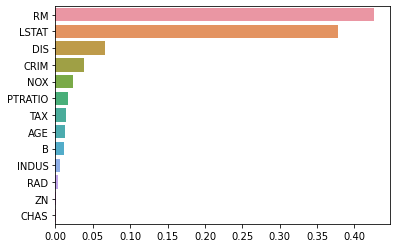

In [5]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, t_target 데이터셋을 적용하여 학습합니다
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


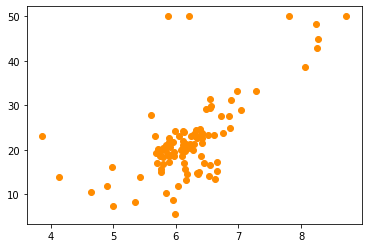

In [6]:
import matplotlib.pyplot as plt

bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)

plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#선형 회귀와 결정 트리 기반 Regressor 생성, DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

#보스턴 주택 가격 데이터에서 시각화를 위해 RM 피처, 결정 데이터엔 PRICE만 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

#학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

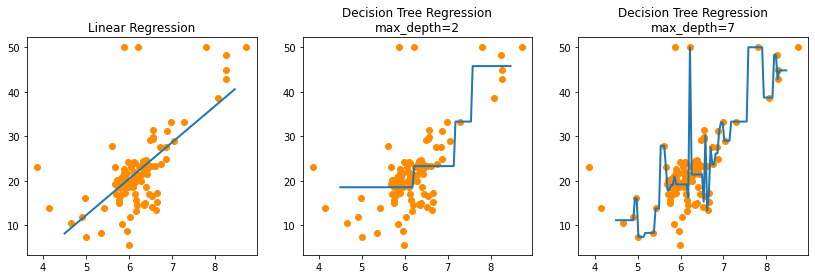

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

#X축 값을 4.~8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
#선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

#DecisionTreeRegressor(max_depth=2) 회귀 예측선
ax2.set_title('Decision Tree Regression\nmax_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2)

#DecisionTreeRegressor(max_depth=7) 회귀 예측선
ax3.set_title('Decision Tree Regression\nmax_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)